### Cho dữ liệu nba_2013.csv
### Sử dụng thuật toán KNN để dự đoán số điểm (points) mà các cầu thủ NBA ghi được trong mùa giải 2013-2014. Mỗi hàng trong dữ liệu chứa thông tin về player thực hiện trong mùa giải 2013-2014 NBA. (với player -- tên player/ pos -- vị trí của player/ g -- số trận mà player đã tham gia/ gs -- số trận mà player đã bắt đầu/ pts -- tổng số point mà player đã ghi được)
1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột không có giá trị null trừ cột 'player', 'bref_team_id', 'season', 'season_end', 'pts', và outputs data với 1 cột là 'pts' => Vẽ biểu đồ quan sát mối liên hệ giữa inputs và outputs data
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Xem kết quả => Nhận xét model
7. Ghi model nếu model phù hợp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
data = pd.read_csv("../../Data/nba_2013.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [3]:
data.shape

(481, 31)

In [4]:
data = data.dropna()

In [5]:
data.shape

(403, 31)

In [6]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013


In [7]:
data.tail()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,...,179,282,36,18,38,60,137,399,2013-2014,2013


In [8]:
# The columns that we will be making predictions with.
inputs = data.drop(["player","bref_team_id","season","season_end","pts"],axis=1)
inputs.shape

(403, 26)

In [9]:
inputs.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,SF,23,63,0,847,66,141,0.468,4,15,...,53,0.660,72,144,216,28,23,26,30,122
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,336,0.815,32,230,262,248,35,3,146,136
4,C,25,56,30,951,136,249,0.546,0,1,...,67,0.836,94,183,277,40,23,46,63,187
6,PF,28,69,69,2498,652,1423,0.458,3,15,...,360,0.822,166,599,765,178,63,68,123,147
7,PF,24,65,2,1072,134,300,0.447,2,13,...,50,0.660,119,192,311,71,24,33,44,126


In [10]:
inputs = pd.get_dummies(inputs)
inputs.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pos_C,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,23,26,30,122,0,0,0,0,1,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,35,3,146,136,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,23,46,63,187,1,0,0,0,0,0
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,63,68,123,147,0,0,1,0,0,0
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,24,33,44,126,0,0,1,0,0,0


In [11]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     403 non-null    int64  
 1   g       403 non-null    int64  
 2   gs      403 non-null    int64  
 3   mp      403 non-null    int64  
 4   fg      403 non-null    int64  
 5   fga     403 non-null    int64  
 6   fg.     403 non-null    float64
 7   x3p     403 non-null    int64  
 8   x3pa    403 non-null    int64  
 9   x3p.    403 non-null    float64
 10  x2p     403 non-null    int64  
 11  x2pa    403 non-null    int64  
 12  x2p.    403 non-null    float64
 13  efg.    403 non-null    float64
 14  ft      403 non-null    int64  
 15  fta     403 non-null    int64  
 16  ft.     403 non-null    float64
 17  orb     403 non-null    int64  
 18  drb     403 non-null    int64  
 19  trb     403 non-null    int64  
 20  ast     403 non-null    int64  
 21  stl     403 non-null    int64  
 22  bl

In [12]:
# The column that we want to predict.
outputs = data["pts"]
outputs = np.array(outputs)
outputs.shape

(403,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.20, random_state = 42)

In [14]:
list_k = []
list_score = []

for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = neigh.score(X_test, y_test)
    list_score.append(score)
    print("Accuracy is ", score,"% for K-Value:",K_value)

Accuracy is  0.9706106398874882 % for K-Value: 2
Accuracy is  0.9725933456177593 % for K-Value: 3
Accuracy is  0.9770730768900523 % for K-Value: 4
Accuracy is  0.978230348461507 % for K-Value: 5
Accuracy is  0.977798100546243 % for K-Value: 6
Accuracy is  0.9764061450426895 % for K-Value: 7
Accuracy is  0.9770400934699496 % for K-Value: 8
Accuracy is  0.9737204054920425 % for K-Value: 9
Accuracy is  0.9731007587419361 % for K-Value: 10
Accuracy is  0.9723657389625773 % for K-Value: 11
Accuracy is  0.9713562563279552 % for K-Value: 12
Accuracy is  0.9711109581151784 % for K-Value: 13
Accuracy is  0.9696185629376203 % for K-Value: 14
Accuracy is  0.9664662550549205 % for K-Value: 15
Accuracy is  0.9645375047786899 % for K-Value: 16


In [15]:
vi_tri = list_score.index(max(list_score))
k = list_k[vi_tri]
print("\nThe optimal number of neighbors is", k, "with", list_score[vi_tri])


The optimal number of neighbors is 5 with 0.978230348461507


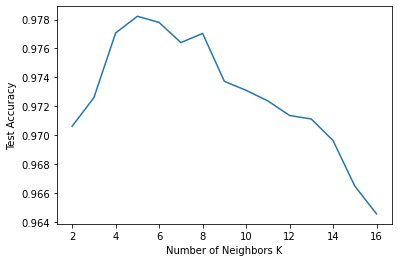

In [16]:
plt.plot(list_k, list_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [17]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [18]:
# Kiểm tra độ chính xác
print("The Train/ Score is: ", knn.score(X_train,y_train)*100,"%")
print("The Test/ Score accuracy is: ", knn.score(X_test,y_test)*100,"%")

The Train/ Score is:  98.01127110964177 %
The Test/ Score accuracy is:  97.8230348461507 %


In [19]:
# Tính MSE
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 7451.879581404321


#### Nhận xét:
* Training và Testing cùng có R^2 cao và gần bằng nhau
* Mô hình trên cho R^2 cao ~ 0.98, cho thấy nó fit 98% dữ liệu => mô hình phù hợp

In [20]:
y_pred = knn.predict(X_test)
y_pred

array([ 450.8,  467.6,  796.4,  198.6,  516.4,   53. , 1585.4,  231. ,
        458.8,   31.4,  986.2,  647.4,   38.6,  768. ,   17. ,   84.6,
         70. ,  747.8,  505.4,   15.6,  114. ,  920.8,  973.6,  230.6,
        144.8,  574.8, 1419.4,   14.2,  995.6, 1075.2,  276.8,  164.6,
        203.6,  595. , 1278.4,  800.2,  956.2, 1387.4, 1335.8, 1008. ,
        702.4,  176. ,  148.4,  429.4, 1854.8,  310.4,  958.4,  352.8,
        799.6,   38.6,  310.4,  772. , 1012.2,  461.2,  758.6,  328. ,
        875.4,  502.2,  684. , 1230.8, 1076.8, 1353.8, 1326.6,   71.8,
         14.2,   34.8, 1011.4,  193.8,  394.6,  747. ,  660.2,  209.6,
         53.2,   14.2,  194.6,  608.8,  908.8,   18.2,   83.6,   78. ,
        590. ])

In [21]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,490,450.8
1,548,467.6
2,820,796.4
3,217,198.6
4,491,516.4


In [22]:
# Save to file in the current working directory
pkl_filename = "NBA_model.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)